# NAIVE BAYES CLASSIFIER

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.model_selection import cross_val_score,train_test_split

In [19]:
# loading dataset
try:
    FraudTransactions=pd.read_csv('C:/Users/soumy/Python_Workspace/GLOBESYN_CODES/FraudDetection/Fraud.csv')
except:
      print('Database not able to load')
df=FraudTransactions

In [20]:
df = df.loc[(df['type'].isin(['CASH_OUT', 'TRANSFER'])),:] #selecting rows with type 'CASH_OUT' and 'TRANSFER'
df.drop(df.columns[[0,3,6,10]], axis=1, inplace=True) #droupping columns
df.type=pd.factorize(df.type)[0] #factorizing the type
df

D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
D:\ProgramFiles\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,0,181.00,181.00,0.0,0.00,0.00,1
3,1,181.00,181.00,0.0,21182.00,0.00,1
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0
19,0,215310.30,705.00,0.0,22425.00,0.00,0
24,0,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...
6362615,1,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,0,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,1,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,0,850002.52,850002.52,0.0,0.00,0.00,1


In [21]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,0,181.00,181.0,0.0,0.0,0.00,1
3,1,181.00,181.0,0.0,21182.0,0.00,1
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0
19,0,215310.30,705.0,0.0,22425.0,0.00,0
24,0,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [22]:
y=df.isFraud
df_train, df_test, y_train, y_test = train_test_split(df.drop(['isFraud'],axis=1),y,test_size=0.3, random_state=1) 

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(df_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(df_test) 

In [24]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[817014  11628]
 [  1485    996]]


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    828642
           1       0.08      0.40      0.13      2481

    accuracy                           0.98    831123
   macro avg       0.54      0.69      0.56    831123
weighted avg       1.00      0.98      0.99    831123



In [26]:
y_score = gnb.predict_proba(df_test)[:,1]
y_score

array([2.46094364e-06, 1.26754865e-06, 1.69335171e-04, ...,
       1.00092893e-05, 1.94214334e-06, 2.43151286e-06])

In [27]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [28]:
roc_auc = auc(false_positive_rate, true_positive_rate)

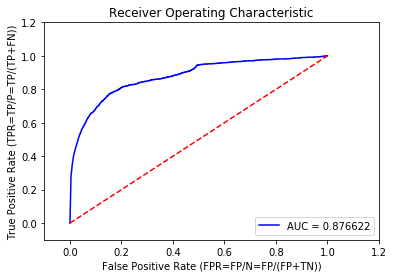

In [29]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate (TPR=TP/P=TP/(TP+FN))')
plt.xlabel('False Positive Rate (FPR=FP/N=FP/(FP+TN))')
plt.show()

In [30]:
scores = cross_val_score(gnb,df, df.isFraud, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.97923051 0.98992748 0.98985529 0.96365881 0.98846378]


In [31]:
print("Average cross-validation score: {}".format(scores.mean()))

Average cross-validation score: 0.9822271752064786
